# Hecho
* Generación de gráfica de tiempo de convergrencia vs learning rate
* Importacion de registros de perdidas

# To do
* Mostrar como los registros de las perdidas divergen cuando el learning rate es demasiado alto
* Poner las gráficas del proceso de optimización


In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import time
from typing import List
import timeit
import scipy.signal  as signal

device = "cuda"
dtype = torch.float64
puntosCreados = []
class NeuralNetworkPrueba(nn.Module):
    def __init__(self):
        super(NeuralNetworkPrueba, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

redDinamica = NeuralNetworkPrueba().to(device)



['ronda 0.tar', 'ronda 2.tar', 'ronda 1.tar', 'ronda 3.tar']


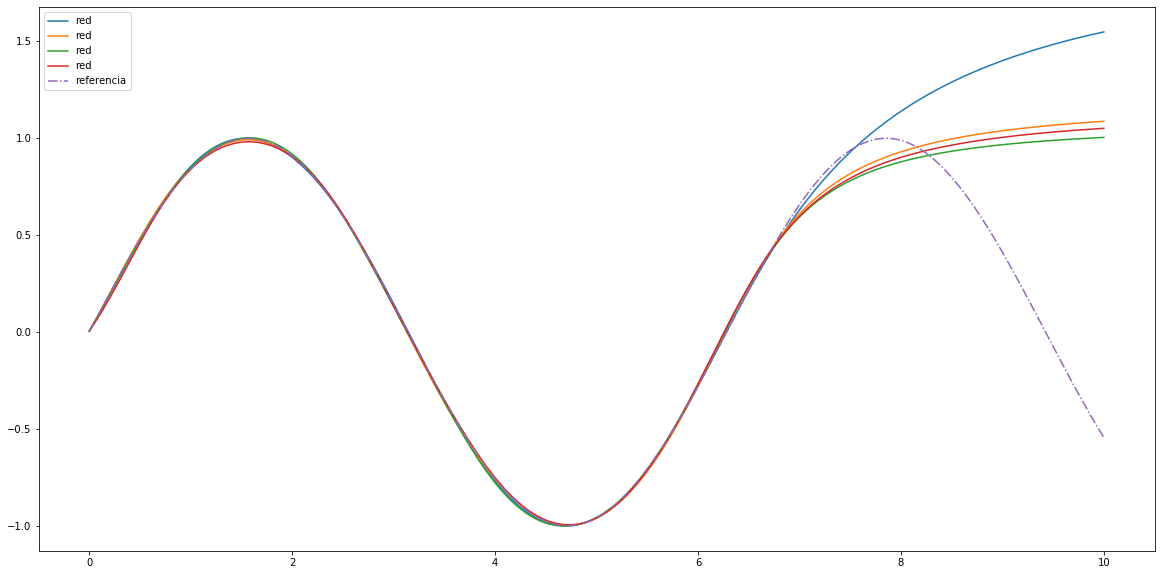

In [9]:
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v5/RESULTADOS/comparacionDeTiempo/terminados")
archivos = [archivito for archivito in os.listdir() ]
print(archivos)
plt.figure(figsize = (20,10))
for nombre in archivos:
    redDinamica.load_state_dict(torch.load(nombre))
    ygrafica = []
    puntosGrafica = torch.linspace(0,10,250)
    for i in puntosGrafica:
        ytemp=redDinamica(torch.tensor([i],device = device))
        ygrafica.append(ytemp.cpu().detach().numpy()[0])
        #ygrafica.append(ytemp.detach().numpy()[0])
    import numpy as np
    puntosGrafica = np.linspace(0,10,250)
    plt.plot(puntosGrafica,ygrafica,label = "red")
plt.plot(puntosGrafica,np.sin(puntosGrafica),label = "referencia",LineStyle="-.")
plt.legend()

In [3]:
import pickle
import os
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v3/RESULTADOS/registrosPerdidas")
archivo = open("registro.tesis","rb")
for i in range(100):
    try:
        #print(pickle.load(archivo))
        pass
    except:
        break
archivo.close()

In [4]:
import pickle
import os
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v4/RESULTADOS/registrosPerdidas")
archivo = open("registro.tesis","rb")
for i in range(100):
    try:
        pass
        #print(pickle.load(archivo))
    except:
        break
archivo.close()

In [5]:
import pickle
import os

class convergencia1():
    def __init__(self,archivo):
        self.rata: float = 0
        self.tiempo: float = -1
        self.perdidas = []
        self.generador(archivo)
    def lectura(self,archivo):
        try:
            leido = pickle.load(archivo)
        except Exception as e:
            if e.args==('Ran out of input',):
                raise Exception("ya no hay nada mas que leer indicado por pickle")
        return leido
    def generador(self,archivo):
        global lecturaDeTiempo
        if not lecturaDeTiempo:
            self.rata = self.lectura(archivo)
        elif self.lectura(archivo) == "rata de aprendizaje":
            self.rata = self.lectura(archivo)
        else:
            raise Exception("Se putio el orden de lectura")
        self.perdidas = self.lectura(archivo)
        if self.lectura(archivo) == "termino en":
            self.tiempo = self.lectura(archivo)
            lecturaDeTiempo = True
        else:
            lecturaDeTiempo = False

convergencias1 = []
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v4/RESULTADOS/registrosPerdidas")
lecturaDeTiempo = True
archivo = open("registro.tesis","rb")
while True:
    try:
        objetoTemporal = convergencia1(archivo)
        convergencias1.append(objetoTemporal)
    except Exception as e:
        print (e.args)
        print (e.__traceback__)
        break
archivo.close()
lecturaDeTiempo = True
archivo = open("registro2.tesis","rb")
while True:
    try:
        objetoTemporal = convergencia1(archivo)
        convergencias1.append(objetoTemporal)
    except Exception as e:
        print (e.args)
        print (e.__traceback__)
        break
archivo.close()
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v5/RESULTADOS/registrosPerdidas")
lecturaDeTiempo = True
archivo = open("registro.tesis","rb")
while True:
    try:
        objetoTemporal = convergencia1(archivo)
        convergencias1.append(objetoTemporal)
    except Exception as e:
        print (e.args)
        print (e.__traceback__)
        break
archivo.close()
print(len(convergencias1))

convergencias1 = sorted(convergencias1,key = lambda x:x.rata)

print([i.tiempo for i in convergencias1 ])

('ya no hay nada mas que leer indicado por pickle',)
('ya no hay nada mas que leer indicado por pickle',)
('ya no hay nada mas que leer indicado por pickle',)
25
[-1, -1, -1, 5987.616899490356, -1, 4668.222300052643, 2878.5269100666046, 957.8760676383972, 1686.554077386856, 538.1005816459656, 788.9826412200928, 223.99418115615845, 257.70272564888, 250.63888549804688, 141.454350233078, 357.1785910129547, 109.60169672966003, 470.3045697212219, 2321.1532537937164, -1, -1, -1, -1, -1, -1]


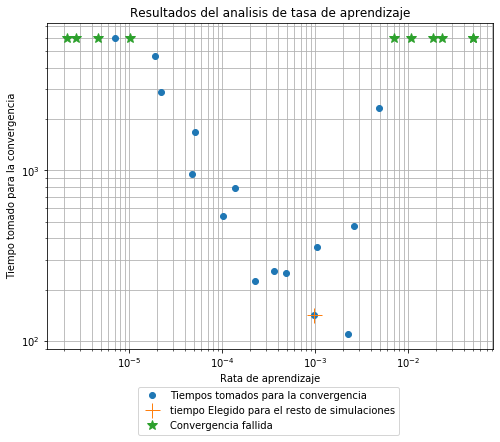

In [6]:
ratasDeConvergencia1 = [simulacion.rata for simulacion in convergencias1 if simulacion.tiempo != -1]
tiemposDeConvergencia1 = [simulacion.tiempo for simulacion in convergencias1 if simulacion.tiempo != -1]

ratasDeConvergenciasFallidas = [simulacion.rata for simulacion in convergencias1 if simulacion.tiempo == -1]
yTemporal = [max(tiemposDeConvergencia1)]*len(ratasDeConvergenciasFallidas)


eleccion = np.argpartition(tiemposDeConvergencia1,5)
eleccion = eleccion[1]
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/graficas")
plt.figure(figsize=(8,6))
plt.loglog(ratasDeConvergencia1,tiemposDeConvergencia1,marker = "o",ms = 6,linewidth = 0,label = "Tiempos tomados para la convergencia")
plt.loglog(ratasDeConvergencia1[eleccion],tiemposDeConvergencia1[eleccion],marker = "+",ms=15,label = "tiempo Elegido para el resto de simulaciones",linewidth = 0)
plt.loglog(ratasDeConvergenciasFallidas,yTemporal,marker = "*",ms=10,label = "Convergencia fallida",linewidth = 0)
plt.title("Resultados del analisis de tasa de aprendizaje")
plt.grid(True,"both")
plt.legend(bbox_to_anchor = (0.8,-0.1))
plt.ylabel("Tiempo tomado para la convergencia")
plt.xlabel("Rata de aprendizaje")
plt.savefig("tiempoDeConvergenciaVsLearningRate.png",dpi = 300, bbox_inches = "tight")
plt.show()

NameError: name 'N' is not defined

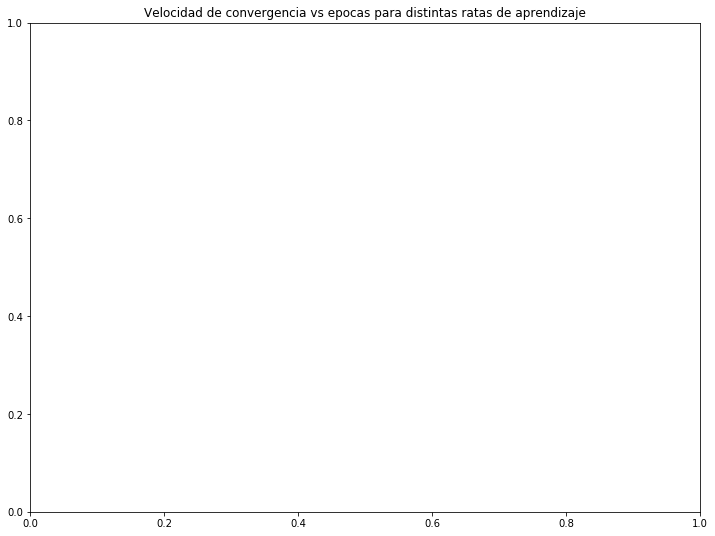

In [7]:

convergieron = [i.perdidas for i in convergencias1 if i.tiempo != -1]
ratasTemporales = [i.rata for i in convergencias1 if i.tiempo != -1]
noConvergieronArriba = [i.perdidas for i in convergencias1 if i.tiempo == -1 and i.rata > 1e-3]
noConvergieronAbajo = [i.perdidas for i in convergencias1 if i.tiempo == -1 and i.rata < 1e-3]
def popper(x_):
    x = x_.copy()
    agresividad = 2
    pops = np.array(range(int((len(x))/agresividad)))*agresividad
    pops = np.flip(pops)
    for p in pops:
        x.pop(p)
    return x

def filtrador(x_):
    b, a = signal.butter(N, 0.075, 'low')
    return signal.filtfilt(b, a, x_)

fig, ax = plt.subplots(figsize = (12,9))
plt.title ("Velocidad de convergencia vs epocas para distintas ratas de aprendizaje")


transparencia = 1

mejorOpcion = 0
for j in range(len(convergieron)):
    i = convergieron[j]
    if convergencias1[eleccion].rata == ratasTemporales[j]:
        mejorOpcion = j
    else:
        ax.semilogy(filtrador(i),color = "#FFC107",label = "Rata de aprendizaje adecuada",alpha = transparencia)

ax.semilogy(filtrador(convergieron[mejorOpcion]),color = "#004D40",label = "Rata de aprendizaje elegida",alpha = 1,linewidth = 1.5)      

for i in noConvergieronArriba:
    ax.semilogy(filtrador(i),color = "#D81B60",label = "Rata de aprendizaje Demasiado Agresiva",alpha = transparencia)

for i in noConvergieronAbajo:
    ax.semilogy(filtrador(i),color = "#1E88E5",label = "Rata de aprendizaje Demasiado Lenta",alpha = transparencia)
ax.set_ylabel("Residuales")
ax.set_xlabel("epocas")
ax.grid(which="both")
display = [10,15,24,len(convergieron)-1]
handles, labels = ax.get_legend_handles_labels()
ax.legend([handle for i,handle in enumerate(handles) if i in display],
      [label for i,label in enumerate(labels) if i in display])
#print(handles)
#print(handles)

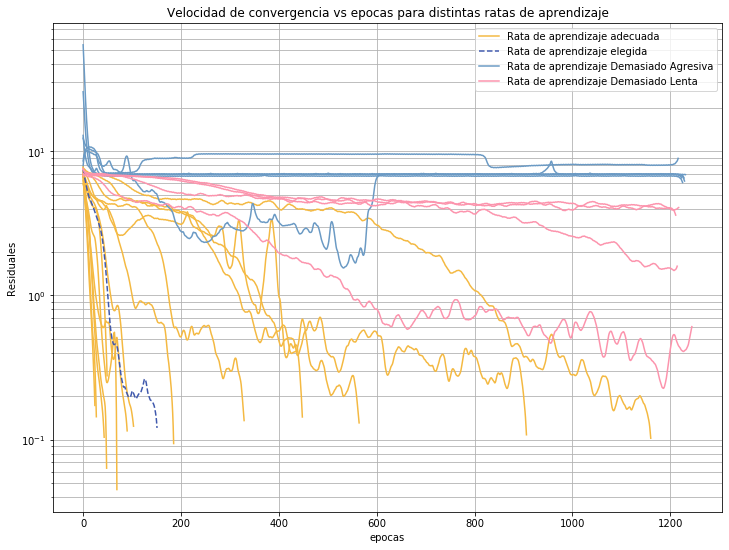

In [10]:

convergieron = [i.perdidas for i in convergencias1 if i.tiempo != -1]
ratasTemporales = [i.rata for i in convergencias1 if i.tiempo != -1]
noConvergieronArriba = [i.perdidas for i in convergencias1 if i.tiempo == -1 and i.rata > 1e-3]
noConvergieronAbajo = [i.perdidas for i in convergencias1 if i.tiempo == -1 and i.rata < 1e-3]
def popper(x_):
    x = x_.copy()
    agresividad = 2
    pops = np.array(range(int((len(x))/agresividad)))*agresividad
    pops = np.flip(pops)
    for p in pops:
        x.pop(p)
    return x

def filtrador(x_):
    b, a = signal.butter(1, 0.075, 'low')
    return signal.filtfilt(b, a, x_)

fig, ax = plt.subplots(figsize = (12,9))
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/graficas")
plt.title ("Velocidad de convergencia vs epocas para distintas ratas de aprendizaje")


transparencia = 1

mejorOpcion = 0
for j in range(len(convergieron)):
    i = convergieron[j]
    if convergencias1[eleccion].rata == ratasTemporales[j]:
        mejorOpcion = j
    else:
        ax.semilogy(filtrador(i),color = "#F4B942",label = "Rata de aprendizaje adecuada",alpha = transparencia)

ax.semilogy(filtrador(convergieron[mejorOpcion]),color = "#4059AD",label = "Rata de aprendizaje elegida",alpha = 1,linewidth = 1.5,linestyle = "--")      

for i in noConvergieronArriba:
    ax.semilogy(filtrador(i),color = "#6B9AC4",label = "Rata de aprendizaje Demasiado Agresiva",alpha = transparencia)

for i in noConvergieronAbajo:
    ax.semilogy(filtrador(i),color = "#FC94AD",label = "Rata de aprendizaje Demasiado Lenta",alpha = transparencia)
ax.set_ylabel("Residuales")
ax.set_xlabel("epocas")
ax.grid(which="both")
display = [10,15,24,len(convergieron)-1]
handles, labels = ax.get_legend_handles_labels()
ax.legend([handle for i,handle in enumerate(handles) if i in display],
      [label for i,label in enumerate(labels) if i in display])
plt.style.context("seaborn-colorblind")
plt.savefig("Convergencia para distintas ratas de aprendizaje",dpi = 300, bbox_inches = "tight")
#print(handles)
#print(handles)

In [11]:
class statSolucion():
    def __init__(self,variable,learningRate,registro_perdida,registro_promedio,tiempo):
        self.variable = variable
        self.learningRate = learningRate
        self.registro_perdida = registro_perdida
        self.registro_promedio = registro_promedio
        self.tiempo = tiempo
        self.epocasPorSample = 20 

os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v4/RESULTADOS/parametros")
lecturaDeTiempo = True
archivo = open("parametrosEncontrados","rb")
statsSoluciones = []
while True:
    try:
        objetoTemporal = pickle.load(archivo)
        if objetoTemporal != "estadisticas de la solución":
            statsSoluciones.append(objetoTemporal)
    except Exception as e:
        print (e.args)
        print (e.__traceback__)
        break
archivo.close()


('Ran out of input',)


In [ ]:
def popper(x_):
    x=x_.copy()
    agresividad = 2
    pops = np.array(range(int((len(x))/agresividad)))*agresividad
    pops = np.flip(pops)
    print(pops)
    for p in pops:
        x.pop(p)
    return x

popper(list(range(11)))
popper(list(range(12)))

[8 6 4 2 0]
[10  8  6  4  2  0]


[1, 3, 5, 7, 9, 11]

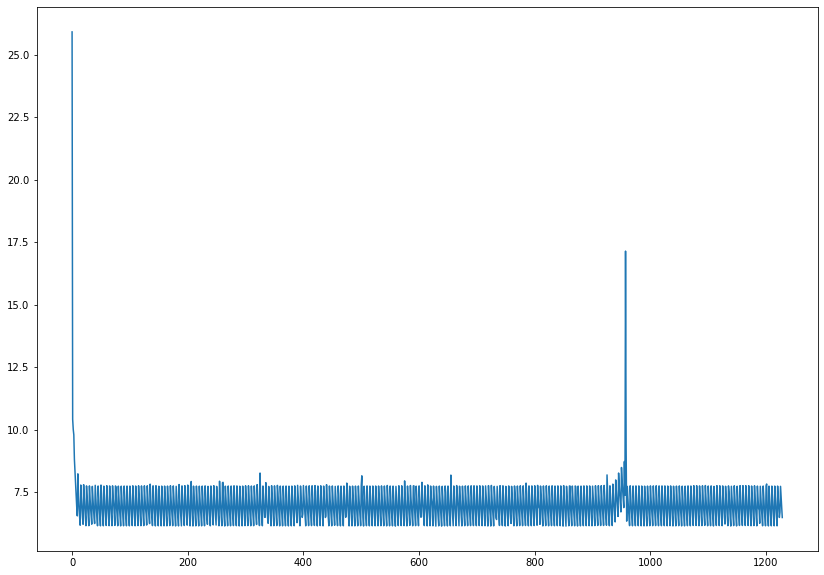

In [ ]:
def correctorTensores(x):
    return [i.item() for i in x]


plt.figure(figsize = (14,10))
ejemplo = convergencias1[-1].perdidas
plt.plot(ejemplo)

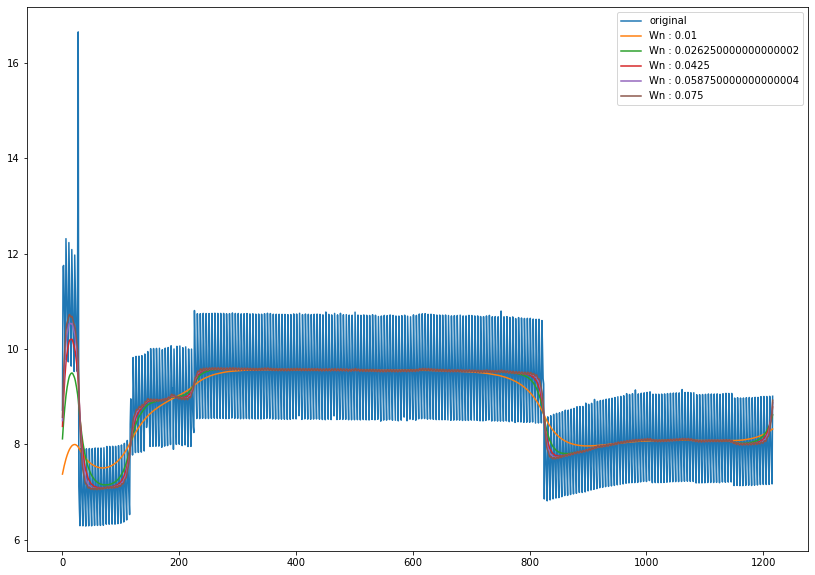

In [ ]:

plt.figure(figsize = (14,10))
ejemplo = convergencias1[-4].perdidas
N = 1
Wns = np.linspace(0.01,0.075,5)
plt.plot(ejemplo,label ="original",alpha = 1)
for Wn in Wns:
    b, a = signal.butter(N, Wn, 'low')
    output_signal = signal.filtfilt(b, a, ejemplo)
    plt.plot(output_signal,label = f"Wn : {Wn}")

plt.legend()

def filtrador(x_):
    b, a = signal.butter(N, 0.075, 'low')
    return signal.filtfilt(b, a, x_)



In [15]:
class ultimaComparacion():
    def __init__(self,tiempos,perdidas,promedios,nombresito):
        self.tiempos = tiempos
        self.registrosPerdidasGlobales = perdidas
        self.registroPromedios = promedios
        self.nombre = nombresito
        self.frecuenciaSampleo = 200 # Sampleo cada 200 datos
        pass
    def anadirDato(self,tiempo,perdida):
        self.tiempos.append(tiempo)
        self.registrosPerdidasGlobales.append(perdida)
os.chdir("/home/UANDES/n.grandas/pythontesis/pythontesis/v5/RESULTADOS/comparacionDeTiempo")
lecturaDeTiempo = True
archivo = open("uniformes3.tar","rb")
uniformes = pickle.load(archivo)
[i.tiempos[-1] for i in uniformes]


[110.42517971992493,
 85.98043394088745,
 67.62089776992798,
 79.4075677394867,
 118.37389135360718]